In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# Check the shape of the DataFrame
shape = df.shape
print(f"Shape of the DataFrame: {shape}")

# Check the data types of the columns
data_types = df.dtypes
print("\nData types of the columns:")
print(data_types)

Shape of the DataFrame: (1338, 7)

Data types of the columns:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [12]:
# Columns of interest
columns_of_interest = ['age', 'sex', 'children', 'bmi', 'smoker', 'region', 'charges']

# Check for missing values
missing_values_count = df[columns_of_interest].isnull().sum()
missing_values_percentage = (df[columns_of_interest].isnull().mean() * 100)

print("Missing values count per column:")
print(missing_values_count)

print("\nPercentage of missing values per column:")
print(missing_values_percentage)

Missing values count per column:
age         0
sex         0
children    0
bmi         0
smoker      0
region      0
charges     0
dtype: int64

Percentage of missing values per column:
age         0.0
sex         0.0
children    0.0
bmi         0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64


In [8]:
df_dropped_rows = df.dropna()

In [9]:
df_dropped_columns = df.dropna(axis=1)

In [10]:
df_filled_value = df.fillna(value=0)  # Replace missing values with 0

In [13]:
# Fill missing values in numerical columns with mean or median
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['charges'] = df['charges'].fillna(df['charges'].mean())
df['children'] = df['children'].fillna(df['children'].median())  # Alternatively, fill with mode

# Fill missing values in categorical columns with mode
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])
df['region'] = df['region'].fillna(df['region'].mode()[0])

# Alternatively, if you choose to drop rows with missing values
# df_dropped = df.dropna(subset=columns_of_interest)

print("\nDataFrame after filling missing values:")
print(df.head())


DataFrame after filling missing values:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


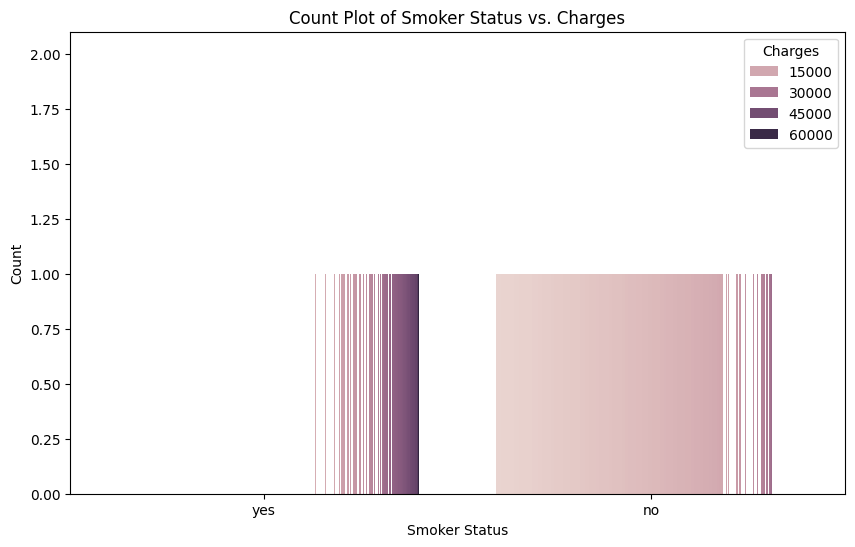

In [14]:
# Example categorical column: 'smoker'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoker', hue='charges')  # Hue here is used to show relationship with the target variable
plt.title('Count Plot of Smoker Status vs. Charges')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.legend(title='Charges')
plt.show()

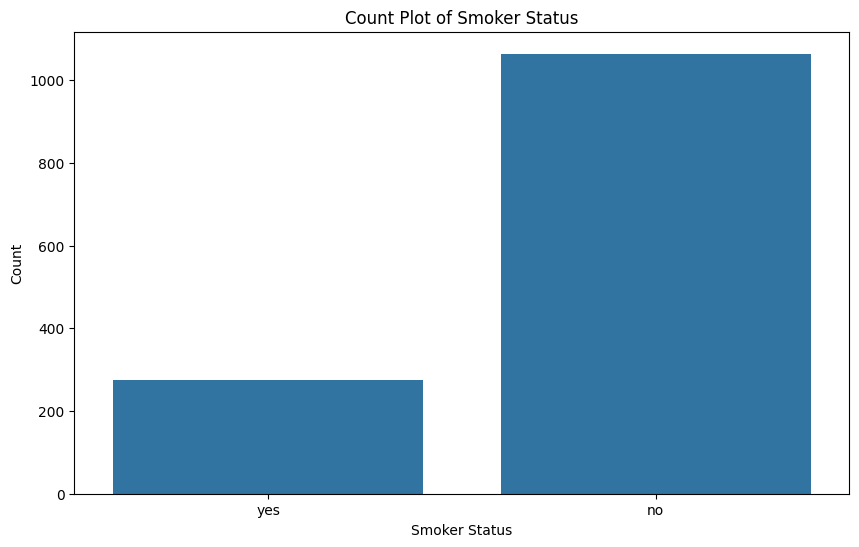

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoker')
plt.title('Count Plot of Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.show()

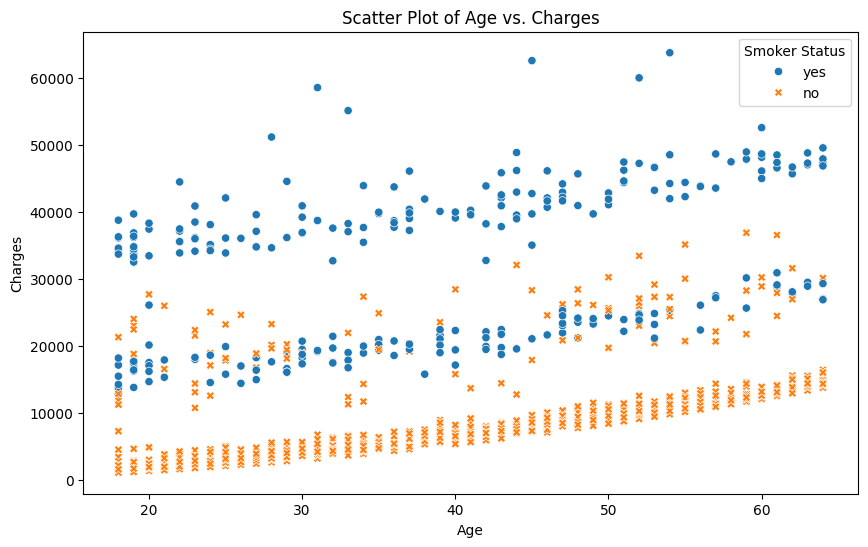

In [16]:
# Example numerical columns: 'age' and 'charges'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', style='smoker')
plt.title('Scatter Plot of Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker Status')
plt.show()

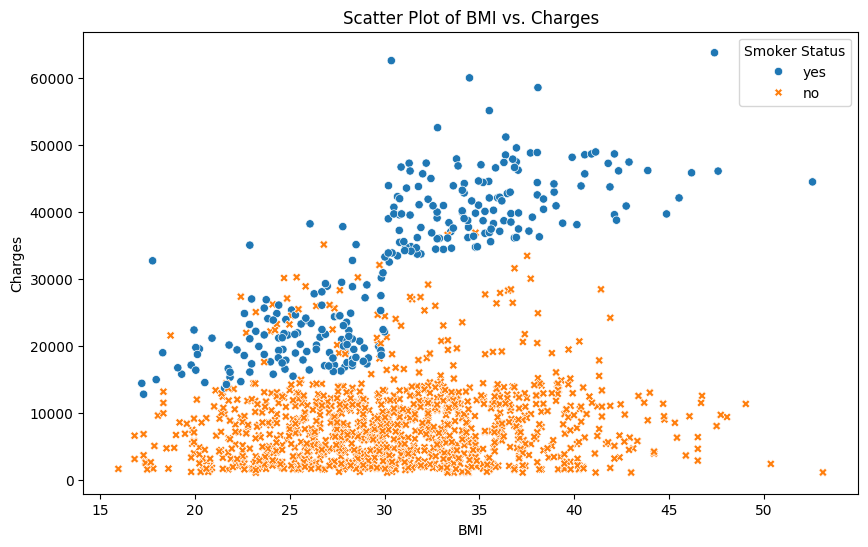

In [17]:
# Scatter plot with another numerical feature 'bmi'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', style='smoker')
plt.title('Scatter Plot of BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker Status')
plt.show()

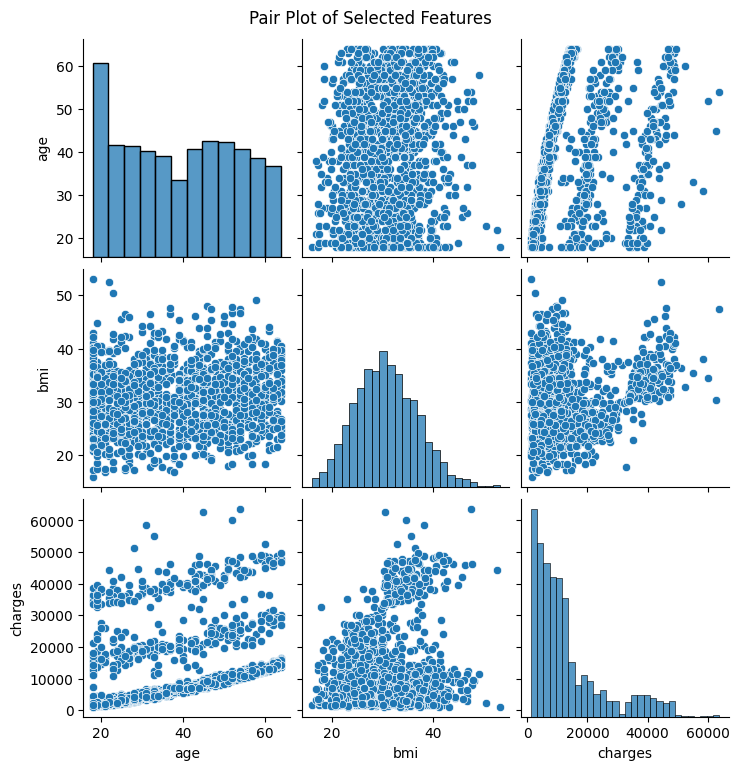

In [18]:
features = ['age', 'bmi', 'charges']  # Replace with your feature columns
sns.pairplot(df[features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

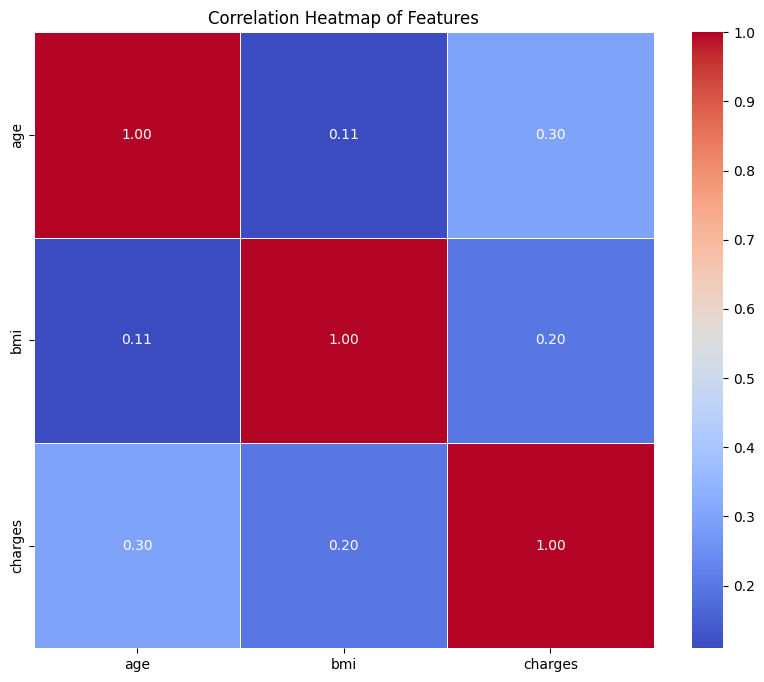

In [19]:
# Calculate the correlation matrix
corr_matrix = df[['age', 'bmi', 'charges']].corr()  # Replace with your feature columns

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

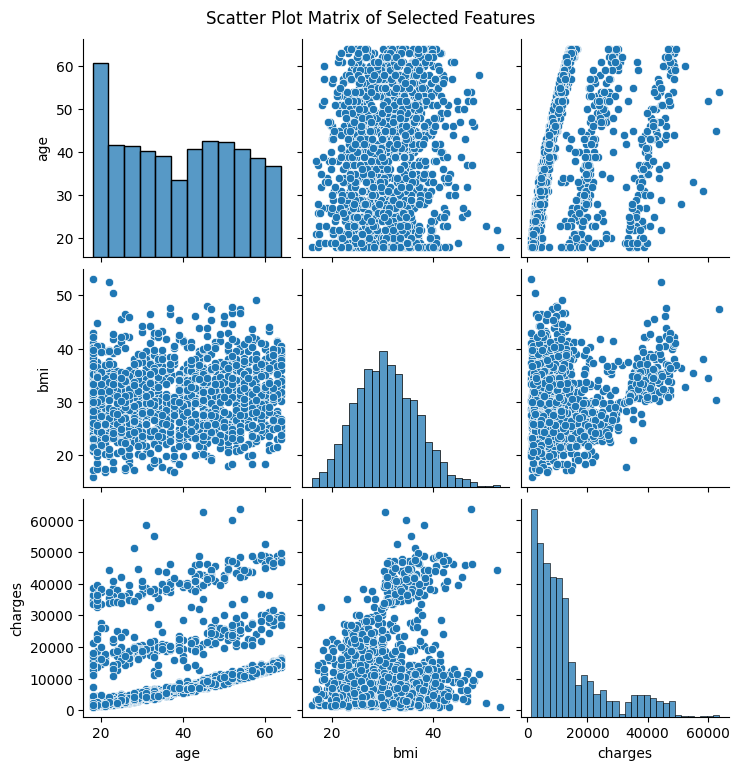

In [20]:
# Scatter plot matrix for selected features
sns.pairplot(df[['age', 'bmi', 'charges']])  # Replace with your feature columns
plt.suptitle('Scatter Plot Matrix of Selected Features', y=1.02)
plt.show()

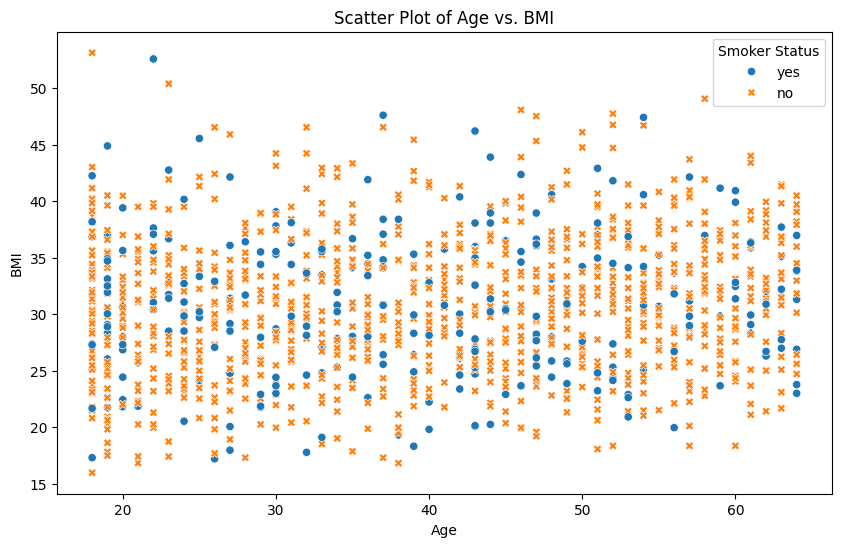

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='bmi', hue='smoker', style='smoker')
plt.title('Scatter Plot of Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Smoker Status')
plt.show()

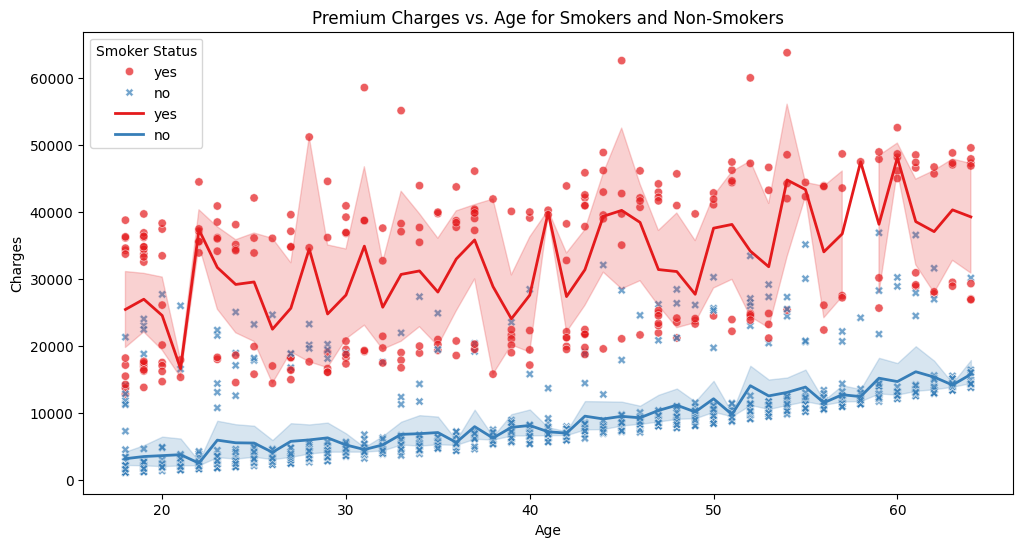

In [22]:
# Scatter plot with regression lines
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', style='smoker', palette='Set1', alpha=0.7)
sns.lineplot(data=df, x='age', y='charges', hue='smoker', estimator='mean', palette='Set1', linewidth=2)
plt.title('Premium Charges vs. Age for Smokers and Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker Status')
plt.show()

In [23]:
import statsmodels.api as sm

# Prepare the data for regression analysis
df_smokers = df[df['smoker'] == 'yes']
df_non_smokers = df[df['smoker'] == 'no']

# Define independent (X) and dependent (Y) variables
X_smokers = sm.add_constant(df_smokers['age'])
Y_smokers = df_smokers['charges']

X_non_smokers = sm.add_constant(df_non_smokers['age'])
Y_non_smokers = df_non_smokers['charges']

# Fit the regression models
model_smokers = sm.OLS(Y_smokers, X_smokers).fit()
model_non_smokers = sm.OLS(Y_non_smokers, X_non_smokers).fit()

# Print the summaries
print("Smokers Regression Model Summary:")
print(model_smokers.summary())

print("\nNon-Smokers Regression Model Summary:")
print(model_non_smokers.summary())


Smokers Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     42.67
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           3.18e-10
Time:                        06:42:16   Log-Likelihood:                -2931.2
No. Observations:                 274   AIC:                             5866.
Df Residuals:                     272   BIC:                             5874.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.029e

In [24]:
# Summary statistics for the 'smoker' column
smoker_distribution = df['smoker'].value_counts()
print("Smoker Distribution:")
print(smoker_distribution)

# Calculate the percentage of each category
smoker_percentage = df['smoker'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Smokers vs. Non-Smokers:")
print(smoker_percentage)

Smoker Distribution:
smoker
no     1064
yes     274
Name: count, dtype: int64

Percentage Distribution of Smokers vs. Non-Smokers:
smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64


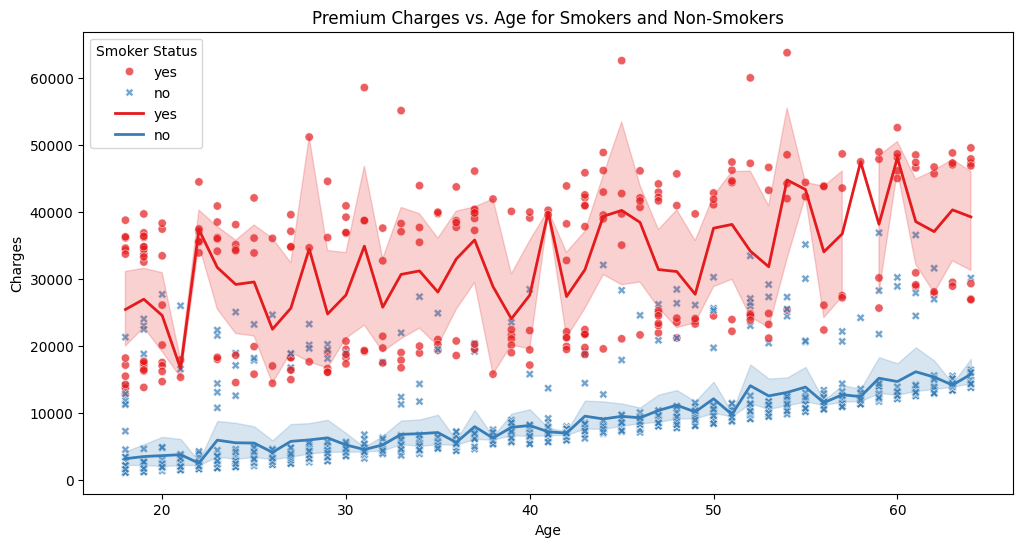

In [25]:
# Scatter plot with regression lines for smoking status
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', style='smoker', palette='Set1', alpha=0.7)
sns.lineplot(data=df, x='age', y='charges', hue='smoker', estimator='mean', palette='Set1', linewidth=2)
plt.title('Premium Charges vs. Age for Smokers and Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker Status')
plt.show()

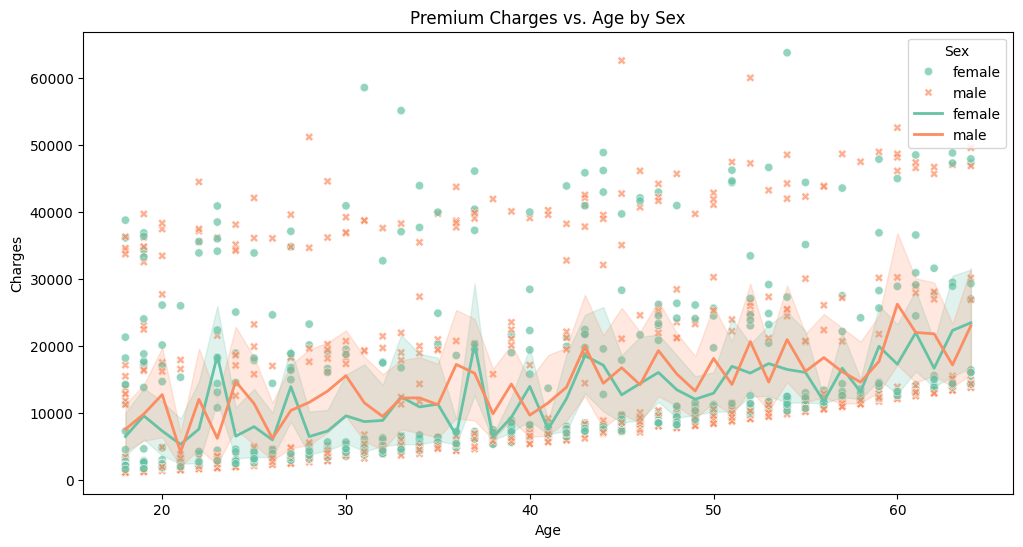

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='sex', style='sex', palette='Set2', alpha=0.7)
sns.lineplot(data=df, x='age', y='charges', hue='sex', estimator='mean', palette='Set2', linewidth=2)
plt.title('Premium Charges vs. Age by Sex')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Sex')
plt.show()

Visualizing plot

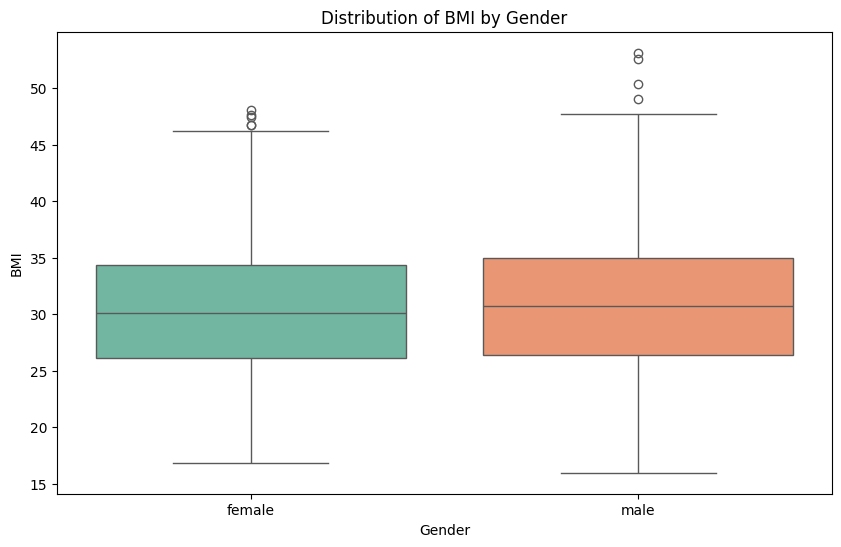

In [27]:
# Box plot for BMI across genders
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='bmi', palette='Set2')
plt.title('Distribution of BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

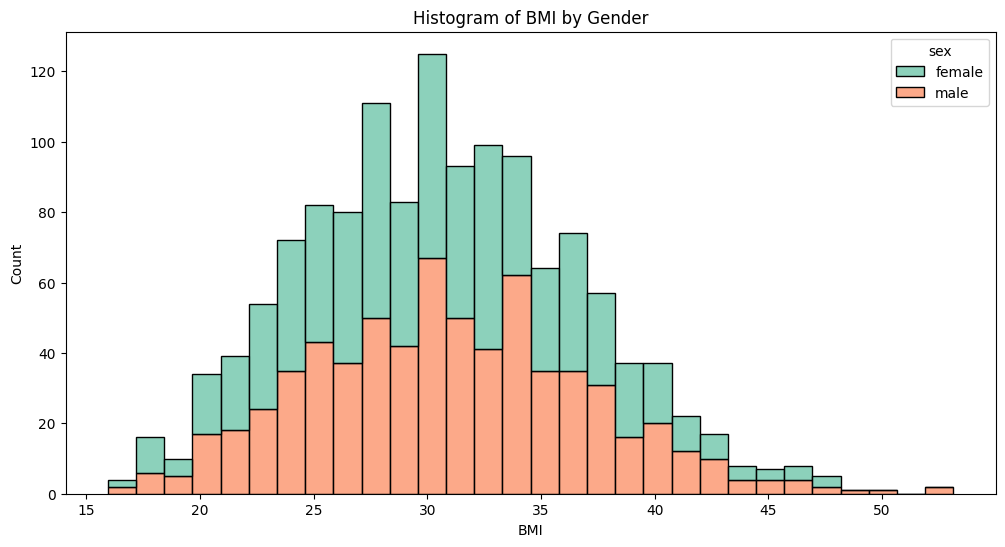

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='bmi', hue='sex', multiple='stack', palette='Set2', bins=30)
plt.title('Histogram of BMI by Gender')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

Statistical analysis

In [29]:
from scipy.stats import ttest_ind

# Separate BMI values by gender
bmi_males = df[df['sex'] == 'male']['bmi']
bmi_females = df[df['sex'] == 'female']['bmi']

# Perform the t-test
t_stat, p_value = ttest_ind(bmi_males, bmi_females)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: 1.697
P-value: 0.090


In [30]:
# Summary statistics for BMI by gender
bmi_summary = df.groupby('sex')['bmi'].describe()
print(bmi_summary)

        count       mean       std     min     25%      50%       75%    max
sex                                                                         
female  662.0  30.377749  6.046023  16.815  26.125  30.1075  34.31375  48.07
male    676.0  30.943129  6.140435  15.960  26.410  30.6875  34.99250  53.13


In [31]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [32]:
df = pd.get_dummies(df, columns=['smoker', 'sex', 'region'], drop_first=True)

In [34]:
df['age'] = df['age'].astype(float)
df['bmi'] = df['bmi'].astype(float)
df['charges'] = df['charges'].astype(float)

In [35]:
df = df.fillna(df.median())

Linear Regression:

Use Case: Predicting a continuous target variable (like charges) based on numerical and categorical features.


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Mean Squared Error: 33596915.851361446
R-squared: 0.7835929767120724


Random Forest Regression:

Use Case: When you have complex, non-linear relationships and want a model that can handle interactions between features without needing explicit specification.

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R-squared: {r2_score(y_test, y_pred_rf)}")


Mean Squared Error: 20932438.77610856
R-squared: 0.8651683748075085


Gradient Boosting Regression:

Use Case: For better performance with complex datasets, especially if you have large datasets and need high predictive accuracy.

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_gb)}")
print(f"R-squared: {r2_score(y_test, y_pred_gb)}")


Mean Squared Error: 18759131.28619481
R-squared: 0.8791672491881917


Summary

Linear Regression: A good starting point for continuous targets with linear assumptions.

Random Forest Regression: Useful for capturing complex, non-linear relationships and interactions.

Gradient Boosting Regression: Offers high performance but requires more computational resources and tuning.

Choose the model based on your specific needs for interpretability, performance, and computational efficiency. Start with simpler models to establish a baseline, then experiment with more complex models to improve performance.